In [ ]:
#Vertical resolution used : 
0.02
0.1
0.5
1.25010428797
8.33294983235
32.8082236775

In [1]:
import sys, os

#sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing_ats'))
#sys.path.append('/Users/ajc/Core/SimDataInputs/ats-repo/ats/tools/utils/meshing_ats')
#import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal

In [2]:
import math
def Distance(x,y):
    d = np.zeros(len(x))
    for i in range(len(x)):
        d[i] = math.hypot(x[-1] - x[i], y[-1] - y[i])
    return d

C
left 0.1901719748262033 11
right 0.23974663502900206 29


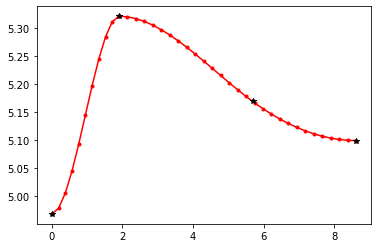

No handles with labels found to put in legend.


---------------------------------------------
center [5.07949 5.04949 4.99949 4.94949 4.89949 4.84949 4.79949 4.74949 4.69949
 4.67949 4.59949 4.49949 4.39949 4.29949 4.09949 3.84949 3.59949] 5.321
5.09949 5.099


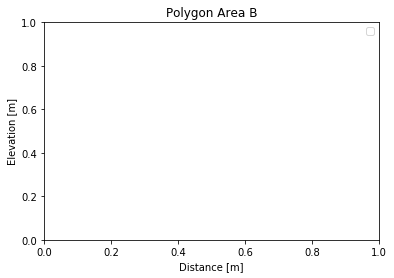

In [4]:
#Vladimir data
site_area = 'C'
if site_area == 'C': 
    print (site_area)
    zv = np.array([5.099, 5.169, 5.321, 4.968])
    zv =zv[::-1]
    northing = [7910344.103,7910341.163,7910337.608, 7910335.845] #original
    easting = [585907.153,585907.605,585908.893,585909.606]
    distC = Distance(northing,easting)
    distC = distC[::-1]
    #print distC, zv
    numx1 = int((distC[1] - distC[0]) / 0.17)
    numx2 = int((distC[-1] - distC[1]) / 0.23)
    #print numx1, numx2
    xnew1 = np.linspace(distC[0],distC[1],numx1)
    xnew2 = np.linspace(distC[1],distC[-1],numx2)
    cs1 = scipy.interpolate.CubicSpline(distC[:2],zv[:2], bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(distC[1:],zv[1:], bc_type='clamped')
elif site_area == 'A':
    print (site_area)
    zv = np.array([5.165, 5.389,5.412,5.200])
    zv =zv[::-1]
    north=[7910477.667,7910482.445,7910483.703,7910484.006] 
    east = [585548.618,585556.012,585559.316,585560.442]
    distA = Distance(north,east)
    distA = distA[::-1]
    numx1 = int((distA[1] - distA[0]) / 0.2) + 4
    numx2 = int((distA[-1] - distA[1]) / 0.24)
    
    xnew1 = np.linspace(distA[0],distA[1],numx1)
    xnew2 = np.linspace(distA[1],distA[-1],numx2)
    
    cs1 = scipy.interpolate.CubicSpline(distA[:2],zv[:2], bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(distA[1:],zv[1:], bc_type='clamped')
elif site_area == 'B':
    print (site_area)
    zv = np.array([5.586,5.580,5.307,5.209])
    north=[7910300.761,7910298.338, 7910297.337,7910296.76]
    east = [585826.986,585825.28,585824.741,585824.364] 
    distB = Distance(north,east)
    distB = np.array(distB[::-1])
    zv = np.array(zv[::-1])
    distB = np.insert(distB,1, distB[0]+0.2)
    zv = np.insert(zv,1, zv[0] + 0.0003)
    
    numx1 = int((distB[2+1] - distB[0]) / 0.1)
    numx2 = int((distB[-1] - distB[2+1]) / 0.2)
    
    xnew1 = np.linspace(distB[0],distB[2+1],numx1)
    xnew2 = np.linspace(distB[2+1],distB[-1],numx2)
    
    cs1 = scipy.interpolate.CubicSpline(distB[:3+1],zv[:3+1], bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(distB[2+1:],zv[2+1:], bc_type='clamped')
    
elif site_area == 'D':
    print (site_area)
    zv = np.array([5.241, 5.245,5.293,5.378])
    zv =zv[::-1]
    x1=[585912.144,585916.144,585918.711,585920.688]

    x1 = [-i + x1[-1] for i in x1]
    x1 =x1[::-1]
    #print x1
    numx1 = int((x1[-1] - x1[0]) / 0.25) + 2
    numx2 = numx1
    #print numx1
    xnew1 = np.linspace(x1[0],x1[3],numx1)
    xnew2 = xnew1
    cs1 = scipy.interpolate.CubicSpline(x1,zv, bc_type='clamped')
    #cs2 = scipy.interpolate.CubicSpline(x1,zv, bc_type=((1, 0.0), (1, .0)))
    
print ('left', xnew1[1] - xnew1[0], numx1)
print ('right', xnew2[-1] - xnew2[-2], numx2)
    
plt.plot(xnew1, cs1(xnew1), '.-', color= 'r', label = 'fitted curve')
plt.plot(xnew2, cs2(xnew2), '.-', color= 'r')
plt.plot(distC, zv, '*', color= 'k', label='measured data')

plt.show()

if 'D' in site_area:
    xnew = xnew1
    zv = cs1(xnew1)
else:
    xnew = np.concatenate((xnew1,xnew2[1:]))
    zv = np.concatenate((cs1(xnew1), cs2(xnew2[1:])))
 
print ('---------------------------------------------')

assert len(zv) == len(xnew)


#trough
observe = 'center'
xloc = 0
mid_pt = (zv[0] + zv[1])/2.

depths_t = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_r = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_c = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 00.35, 0.4, 0.42, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
if observe == 'trough':
    z_location = [zv[1] - v for v in depths_t] #taking z at zv[1] to make sure the observed point lie within above cell
    xloc = np.where(zv == zv[0])
    xloc = xnew[xloc]
elif observe == 'rim':
    if 'B' in site_area: # max in polygon B is the center.. so we need to get the right location for rim
        z_location = [zv[numx1] - v for v in depths_r]
        print ('B')
    else:
        z_location = [max(zv) - v for v in depths_r]
        print ('Not B')
    xloc = np.where(zv == max(zv))
elif observe == 'center':
    if 'B' in site_area:
        z_location = [zv[-1] - v for v in depths_c]
    else:
        z_location = [zv[-2] - v for v in depths_c]
    
zv = np.round(zv, 5)
xnew = np.round(xnew,5)
print (observe, np.round(z_location,5), max(zv))
print (zv[-2], zv[-1])

plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Polygon Area B')
plt.legend()


In [ ]:
z_smooth = zv
x = xnew
print x, z_smooth
print len(x), len(z_smooth)
print 'Seepage face high at the center ', max(z_smooth - z_smooth[0])

In [ ]:
#trough
observe = 'center'
xloc = 0
zv = z_smooth
mid_pt = (zv[0] + zv[1])/2.

depths_t = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_r = [0.02, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.30, 0.34, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_c = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.42, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
if observe == 'trough':
    z_location = [zv[1] - v for v in depths_t] #taking z at zv[1] to make sure the observed point lie within above cell
    xloc = np.where(zv == zv[0])
    xloc = x[xloc]
elif observe == 'rim':
    z_location = [max(zv) - v for v in depths_r]
    xloc = np.where(zv == max(zv))
elif observe == 'center':
    z_location = [zv[-2] - v for v in depths_c]
print round(z_smooth[10],5), max(zv), xloc
print np.round(z_location,3)
print  4.8972 -0.02, xloc, z_smooth[1]

In [ ]:
import meshing_ats

if site_area == 'A':
    arclen = 16
elif site_area == 'B':
    arclen = 6
elif site_area == 'C':
    arclen = 10
elif site_area == 'D':
    arclen = 10
m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x,z_smooth, arclen, curved=False)

print site_area, arclen
m2.plot()

In [ ]:
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(4):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(15): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

m3.write_exodus(outfile + "areaC-3layers-Vladimir-om10cm.exo")


In [ ]:
0.02
0.1
0.5
1.25010428797
8.33294983235
32.8082236775